# Aula 5 - Regressão e Machine Learning

In [19]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
url = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
enem = pd.read_csv(url)
enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


In [21]:
print(enem.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [22]:
enem.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00",...,"97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,...,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,...,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,...,455.60,0.00,1.00,120.00,40.00,40.00,100.00,40.00,360.00,3.00
50%,"180,010,373,993.50","2,018.00","3,137,700.00",31.00,19.00,0.00,2.00,1.00,"3,126,109.00",31.00,...,516.50,1.00,1.00,120.00,120.00,120.00,120.00,60.00,520.00,4.00
75%,"180,012,032,768.50","2,018.00","3,550,308.00",35.00,24.00,0.00,3.00,1.00,"3,550,308.00",35.00,...,600.00,1.00,1.00,140.00,120.00,120.00,140.00,120.00,620.00,5.00
max,"180,014,002,596.00","2,018.00","5,300,108.00",53.00,78.00,3.00,5.00,4.00,"5,300,108.00",53.00,...,989.90,1.00,9.00,200.00,200.00,200.00,200.00,200.00,"1,000.00",20.00


In [23]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_notas = enem[colunas_de_notas].dropna()
enem_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
enem_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [24]:
resumo_notas = enem_notas.corr()
resumo_notas

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


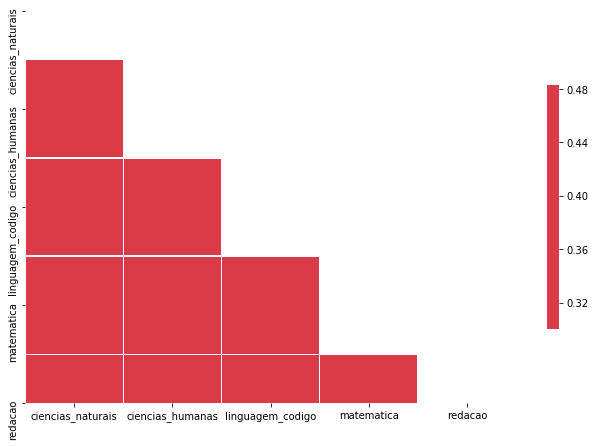

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters
#Outras bibliotecas para instalar

mask = np.triu(np.ones_like(resumo_notas, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(resumo_notas, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

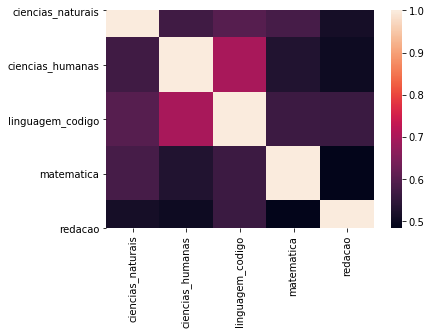

In [47]:
sns.heatmap(resumo_notas) #Forma multi-colorida de se ver a projeção gráfica do ENEM

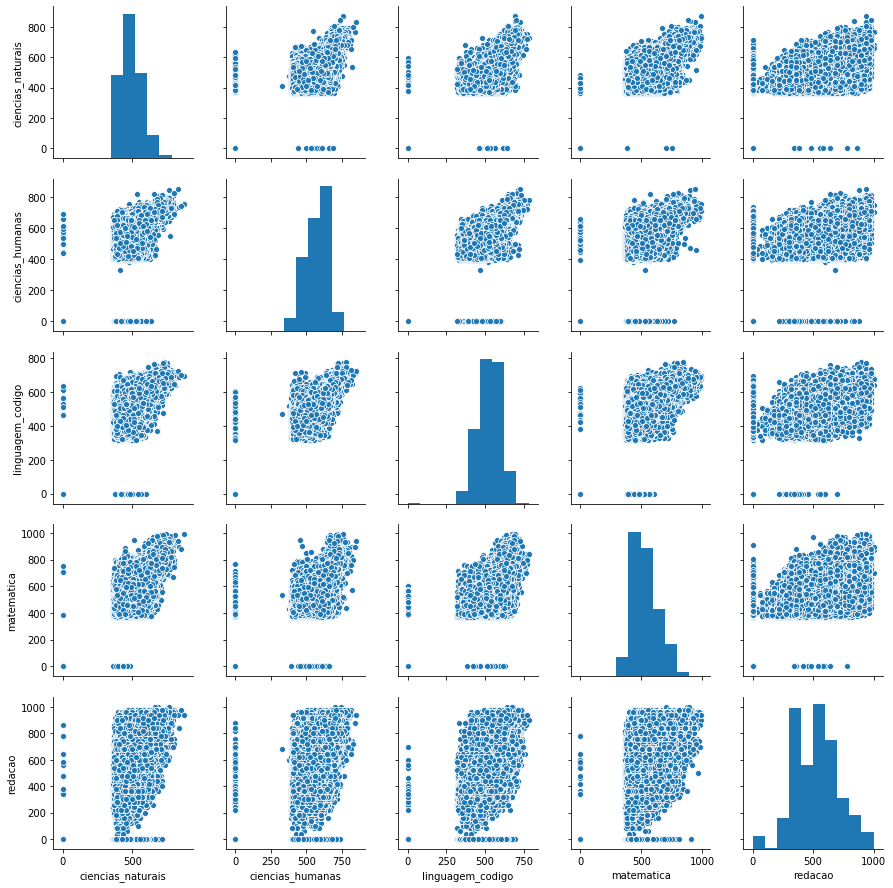

In [26]:
#ML para fazer as predições de algumas notas.
sns.pairplot(enem_notas)

In [48]:
var4 = enem_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
var4.head()
# processo de classificação e como as máquinas podem aprender esse processo: 
# nessa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [49]:
y_adivinhar = enem_notas['linguagem_codigo']
y_adivinhar
# Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação
# para prever as notas da prova de linguagem e códigos

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)
# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(var4, y_adivinhar)

In [51]:
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [52]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


In [53]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
# Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão

C:\Users\user\Anaconda3-2019.10\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [54]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]
# Para realizar a predição chamamos o método .predict() do modelo.

array([507.82371068, 539.68470532, 507.63259622, 455.35972018,
       567.06769021])

In [61]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

In [62]:
y_teste[:5].describe() #Por titulo de curiosidade

count     5.00
mean    512.00
std      52.33
min     420.20
25%     518.10
50%     536.90
75%     539.20
max     545.60
Name: linguagem_codigo, dtype: float64

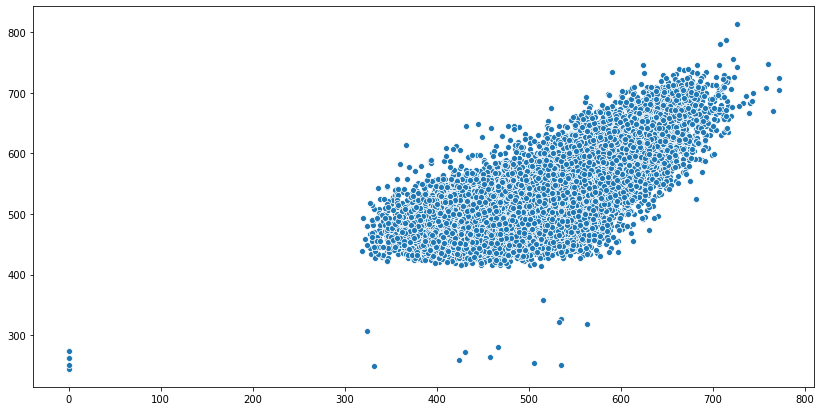

In [65]:
import matplotlib.pyplot as plt

# vamos plotar alguns gráficos:
plt.figure(figsize=(14,7))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

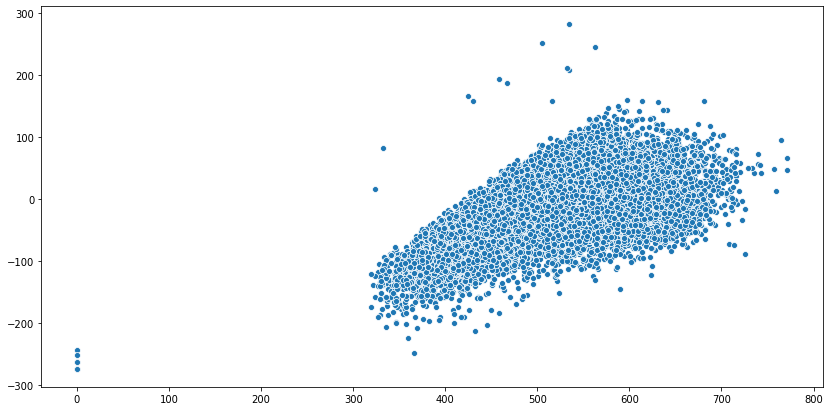

In [66]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

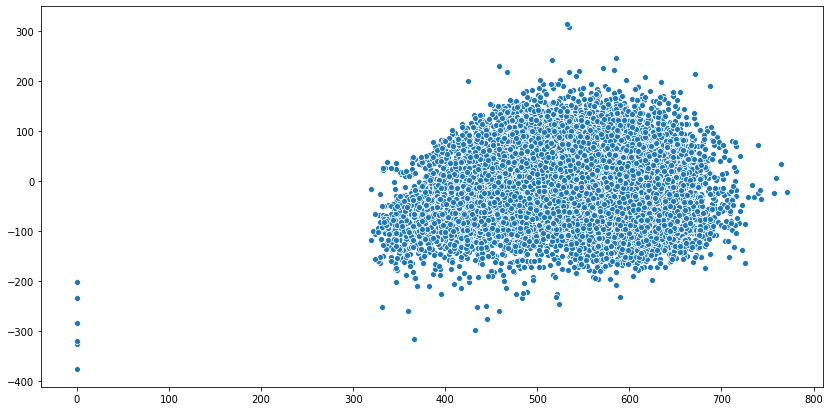

In [67]:
#predição(1).
plt.figure(figsize=(14,7))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

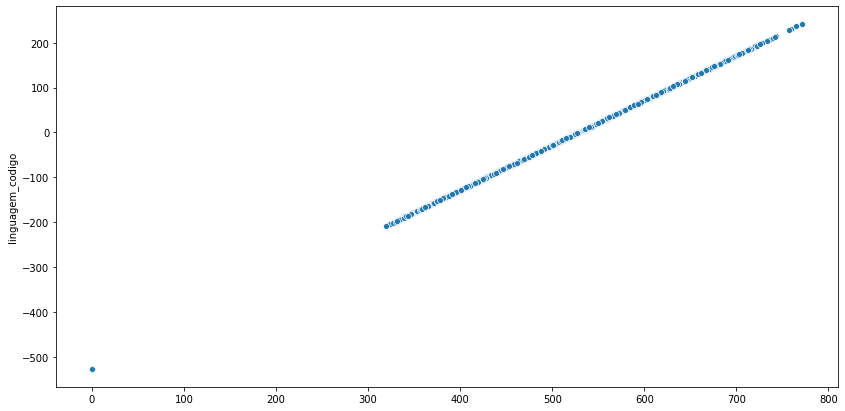

In [70]:
#predição(2)
plt.figure(figsize=(14,7))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

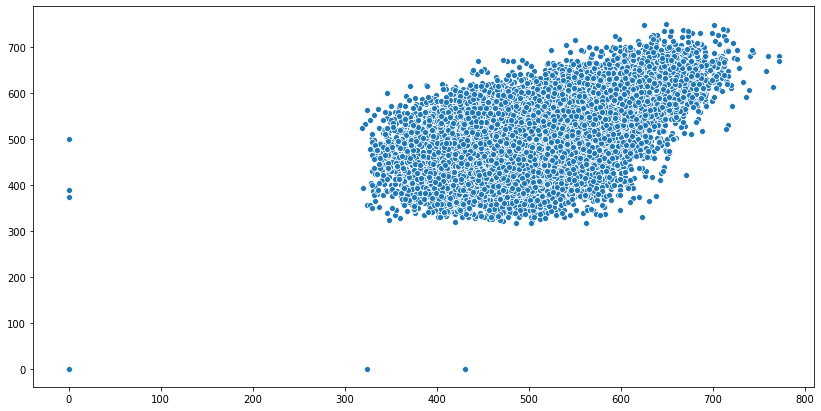

In [71]:
# machine learning com base em "árvores"

from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(14,7))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

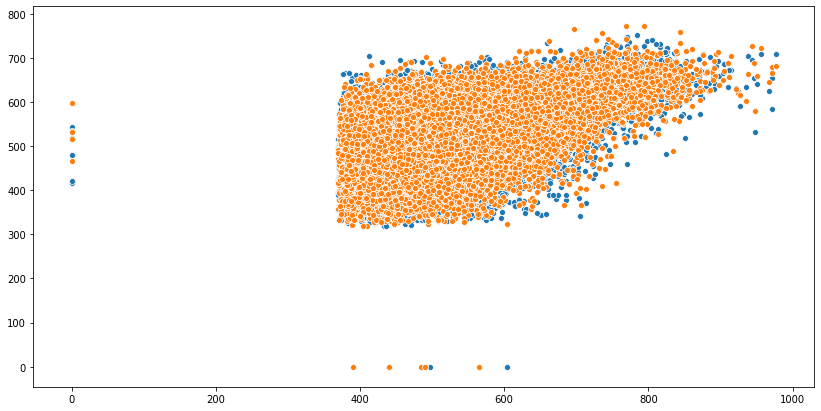

In [73]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [74]:
# aqui vamos usar o erro quadrático médio. 
#Existem centenas de métricas de avaliação tudo vai depender do que você precisa e o que você está prevendo.

from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4134.87676412534

In [75]:
mean_squared_error(y_teste, y_teste)

0.0

In [76]:
# outra classificação p/ dados é o chamado método 'Dummy'

from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.5388280703755

# URL do note da Aula 5: https://colab.research.google.com/drive/1TwElIw6D77oQF4IUS9uDGeXr0C0ivtFg#scrollTo=CT9aovdRhNBZ